# Пропускная способность инференса

In [1]:
from sklearn.datasets import load_digits

ds = load_digits()

X = ds["data"]
y = ds["target"]

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline

clf = Pipeline([
    # ("scaler", StandardScaler()),
    # ("classifier", LogisticRegression()),
    # ("classifier", RandomForestClassifier(n_estimators=100)),
    ("classifier", CatBoostClassifier(n_estimators=100)),
]).fit(X_train, y_train)

Learning rate set to 0.5
0:	learn: 1.5528448	total: 53.7ms	remaining: 5.31s
1:	learn: 1.0792717	total: 60.6ms	remaining: 2.97s
2:	learn: 0.7816384	total: 67.6ms	remaining: 2.19s
3:	learn: 0.6149772	total: 74.4ms	remaining: 1.79s
4:	learn: 0.5036011	total: 81.2ms	remaining: 1.54s
5:	learn: 0.4331487	total: 88ms	remaining: 1.38s
6:	learn: 0.3764895	total: 94.9ms	remaining: 1.26s
7:	learn: 0.3237940	total: 102ms	remaining: 1.17s
8:	learn: 0.2873393	total: 109ms	remaining: 1.1s
9:	learn: 0.2614587	total: 116ms	remaining: 1.04s
10:	learn: 0.2368273	total: 123ms	remaining: 995ms
11:	learn: 0.2165800	total: 130ms	remaining: 953ms
12:	learn: 0.1993735	total: 137ms	remaining: 917ms
13:	learn: 0.1842734	total: 144ms	remaining: 884ms
14:	learn: 0.1708763	total: 151ms	remaining: 855ms
15:	learn: 0.1553851	total: 158ms	remaining: 829ms
16:	learn: 0.1441707	total: 165ms	remaining: 804ms
17:	learn: 0.1336074	total: 171ms	remaining: 781ms
18:	learn: 0.1275729	total: 178ms	remaining: 760ms
19:	learn: 0

In [22]:
batch_sizes = [2**i for i in range(10)]

In [23]:
import numpy as np
from timeit import default_timer as timer

n_iterations = 100

elapsed = np.zeros((len(batch_sizes), n_iterations))

for i, bsize in enumerate(batch_sizes):
    for j in range(n_iterations):
        sample_idx = np.random.choice(a=X_test.shape[0], size=bsize)
        batch = X_test[sample_idx]
        start = timer()
        clf.predict(batch)
        end = timer()
        elapsed[i, j] = end - start
        


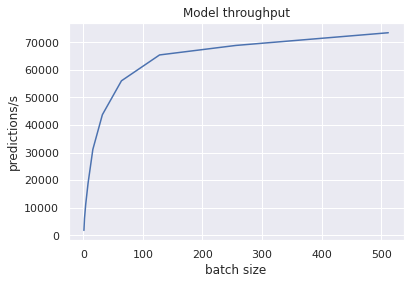

In [24]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.set()
elapsed_mean = elapsed.mean(axis=1)

throughput = batch_sizes / elapsed_mean

plt.plot(batch_sizes, throughput)
plt.title("Model throughput")
plt.xlabel("batch size")
plt.ylabel("predictions/s");

## Transformers benchmark

In [7]:
from transformers import PyTorchBenchmark, PyTorchBenchmarkArguments

args = PyTorchBenchmarkArguments(models=["bert-base-uncased"], batch_sizes=[8], sequence_lengths=[8, 32, 128, 512])

benchmark = PyTorchBenchmark(args)

/home/filonov/.local/lib/python3.8/site-packages/transformers/benchmark/benchmark_args_utils.py:136: FutureWarning: The class <class 'transformers.benchmark.benchmark_args.PyTorchBenchmarkArguments'> is deprecated. Hugging Face Benchmarking utils are deprecated in general and it is advised to use external Benchmarking libraries  to benchmark Transformer models.
  warnings.warn(


/home/filonov/.local/lib/python3.8/site-packages/transformers/benchmark/benchmark_utils.py:620: FutureWarning: The class <class 'transformers.benchmark.benchmark.PyTorchBenchmark'> is deprecated. Hugging Face Benchmarking utils are deprecated in general and it is advised to use external Benchmarking libraries  to benchmark Transformer models.
  warnings.warn(


In [10]:
results = benchmark.run()

1 / 1

====================       INFERENCE - SPEED - RESULT       ====================
--------------------------------------------------------------------------------
          Model Name             Batch Size     Seq Length     Time in s   
--------------------------------------------------------------------------------
      bert-base-uncased              8               8             0.093     
      bert-base-uncased              8               32             0.27     
      bert-base-uncased              8              128            1.094     
      bert-base-uncased              8              512            5.602     
--------------------------------------------------------------------------------

====================      INFERENCE - MEMORY - RESULT       ====================
--------------------------------------------------------------------------------
          Model Name             Batch Size     Seq Length    Memory in MB 
------------------------------------------